In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
import os
import warnings
import numpy as np
import xarray as xr
import pandas as pd
from tempfile import mkstemp
import weakref
import requests
import logging
from numpy import atleast_1d

from gis import maybe_swap_spatial_dims
from datasets.era5 import get_data as get_era5_data

try:
    from contextlib import nullcontext
except ImportError:
    import contextlib
    
    @contextlib.contextmanager
    def nullcontext():
        yield 
    

c:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [12]:
from geo_cutout import GeoCutout
from data import geocutout_prepare
    
x_start = 0
x_stop = 1
y_start = 50
y_stop = 51
dx = 0.1
dy = 0.1
time = '2019-01-01'
dt = "H"
module = "macrostrat"


x = slice(*sorted([x_start, x_stop]))
y = slice(*sorted([y_start, y_stop]))

gc = GeoCutout('result.netcdf', 
               x=x, 
               y=y,
               dx=dx,
               dy=dy,
               time=time, 
               dt=dt,
               )
# litgrid = get_lith_data(gc, 'lithology')
# era5grid_temp = get_era5_data(gc, 'temperature')

geocutout_prepare(gc, features=["lithology"])
# geocutout_prepare(gc, features=["temperature"])

ValueError: unable to infer dtype on variable 'lithology'; xarray cannot serialize arbitrary Python objects

In [7]:
temp = gc.data["temperature"].to_numpy()

In [9]:
temp = 

(24, 9, 9)

In [3]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [13]:
import geopandas as gpd
from io import StringIO

from geo_cutout import GeoCutout
from data import geocutout_prepare

x_start = -1.4
x_stop = 0.6
y_start = 49.8
y_stop = 51.8
dx = 0.01
dy = 0.01
time = '2019-01-01'
dt = "H"
module = "macrostrat"


x = slice(*sorted([x_start, x_stop]))
y = slice(*sorted([y_start, y_stop]))

geocutout = GeoCutout('result.netcdf', 
               x=x,
               y=y,
               dx=dx,
               dy=dy,
               time=time,
               dt=dt,
               )
lith = get_data(geocutout, 'lit')

Coordinates:
  * x        (x) float64 -1.4 -1.39 -1.38 -1.37 -1.36 ... 0.57 0.58 0.59 0.6
  * y        (y) float64 49.8 49.81 49.82 49.83 49.84 ... 51.77 51.78 51.79 51.8
    lon      (x) float64 -1.4 -1.39 -1.38 -1.37 -1.36 ... 0.57 0.58 0.59 0.6
    lat      (y) float64 49.8 49.81 49.82 49.83 49.84 ... 51.77 51.78 51.79 51.8


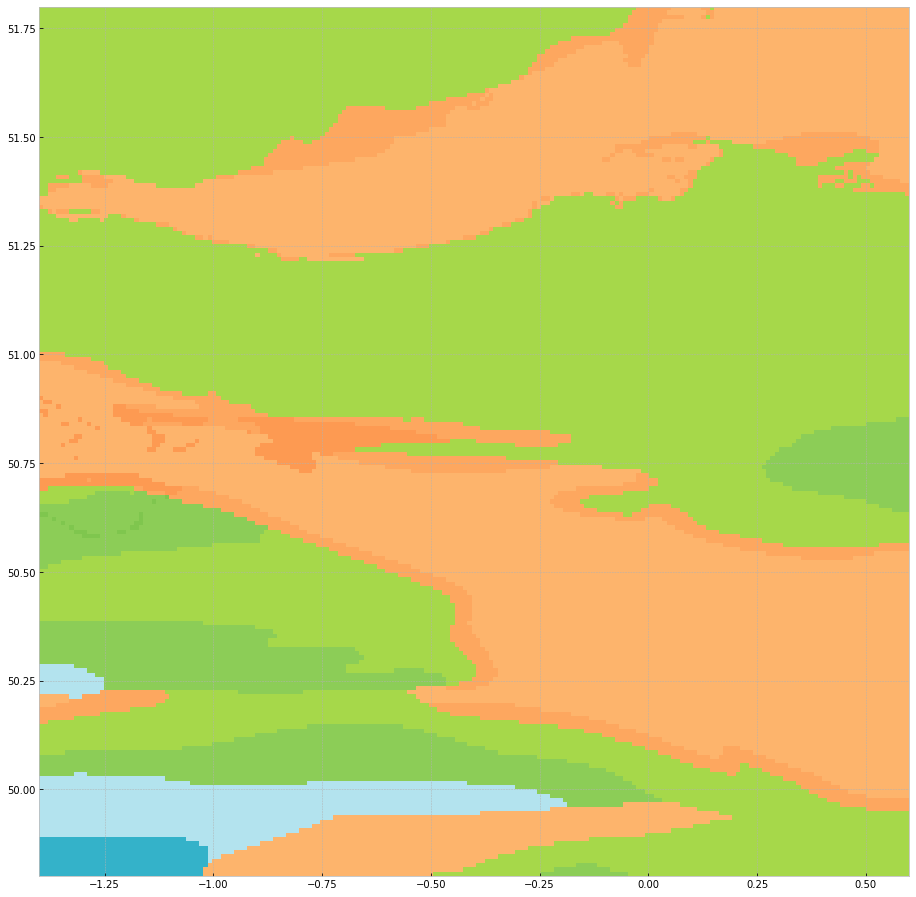

In [27]:

# print(lith["lithology"].coords["x"].to_numpy())
plot_lith(lith["lithology"])

In [10]:
n = 100
lons = np.random.uniform(0., 10, size=n)
lats = np.random.uniform(40., 50, size=n)

lengths = list()
liths = list()

from tqdm import tqdm

for lng, lat in tqdm(zip(lons, lats)):

    draw = get_macrostrat(lng, lat)
    lengths.append(len(draw))
    liths.append(draw['lith'])


0it [00:00, ?it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
1it [00:00,  1.25it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
3it [00:02,  1.23it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
4it [00:03,  1.26it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
5it [00:03,  1.30it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
6it [00:04,  1.30it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
7it [00:05,  1.37it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
8it [00:06,  1.20it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
9it [00:07,  1.21it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
11it [00:08,  1.15it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
14it [00:11,  1.25it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
15it [00:11,  1.28it/s]WARNING:fiona.ogrext:Skipping field liths: invalid type 1
16it [00:12,  1.27it/s]WARNING:fiona.ogre

In [39]:
import re


line = 'clay [5.0%..50.0%]; impure Carbonate [5.0%..50.0%]; limestone [50.0%..95.0%]; sand [5.0%..50.0%]'
get_percentages(line)

{'minors': ['clay', 'impure carbonate', 'sand'], 'major': 'limestone'}

In [45]:
    


for i, lith in enumerate(liths):

    inst = Lith()
    inst = inst.interpret_macrostrat(lith)

    if i == 10: break

    


-------------------
0               biogenic carbonate rocks and evaporite
1    Major:{mica schist}, Minor{marble,amphibolite,...
2                                    sedimentary rocks
Name: lith, dtype: object
{'biogenic': None, 'carbonate': None, 'rocks': None, 'evaporite': None, 'mica schist': 'major', 'marble': 'minor', 'amphibolite': 'minor', 'gneiss': 'minor', 'sedimentary rock': None}
-------------------
0    basalt group
Name: lith, dtype: object
{'basalt': None, 'group': None}
-------------------
0    
Name: lith, dtype: object
{}
-------------------
0                                    sedimentary rocks
1    carbonateSedimentaryRock [5.0%..50.0%]; chalk ...
2             Major:{claystone}, Minor{marl,sandstone}
Name: lith, dtype: object
{'sedimentary rock': None, 'chalk': 'major', 'carbonatesedimentaryrock': 'minor', 'impure carbonate': 'minor', 'limestone': 'minor', 'sand': 'minor', 'claystone': 'major', 'marl': 'minor', 'sandstone': 'minor'}
-------------------
0           